# TESS Data in the Cloud with TIKE

Adapted from [Project TIKEBook on GitHub](https://github.com/spacetelescope/project-tikebook/blob/main/notebooks/00-the-cloud/00-the-cloud.ipynb)

In this live coding exercise, we're going to take some of the things we've learned and try them out ourselves! This is a good time to get practice using `astroquery` while learning how to work with TESS data in the cloud.

Before we get started, make sure the environment in the upper right is set to "TESS Environment".

## Learning Goals: 
- Understand what TIKE is, and the principles behind cloud platforms
- Define cloud terminology: what is a “bucket” or a server? For that matter, what is the “cloud”?
- Access MAST data through astroquery by name, region, or criteria
- Query TESS data and show a light curve

## What is TIKE?

TIKE stands for the *Timeseries Integrated Knowledge Engine*.

TIKE uses a web-based platform, called JupyterHub, to allow you to run [Jupyter Notebooks](https://jupyterlab.readthedocs.io/en/latest/) and other software "on the cloud" using your web browser: you don't need to install anything on your local computer. TIKE has access to a cloud copy of the [MAST Archive](https://archive.stsci.edu), enabling anyone to access and analyze data from NASA's [TESS mission](https://archive.stsci.edu/missions-and-data/tess). We also have copies of other mission datasets, including data from HST, GALEX, and PanSTARRS. They are generally cataloged in full on the MAST Public Datasets page, so check there for an updated list.

TIKE is continually maintained and updated by humans, so if you run into issues please let us know. Don't hesitate to send us your suggestions for packages and tutorials, either through the [MAST help desk](mailto:archive@stsci.edu) or the [tike_content repository](https://github.com/spacetelescope/tike_content).

## What is the "cloud"?

The "cloud", or cloud computing, refers to the practice of remotely accessing computing resources, rather than hosting them yourself. This term might also be used to refer to software and databases running on those servers. As Randall Munroe put it, "turns out the cloud is just other people's computers".

In our case, "the cloud" is the AWS East Datacenters in northern Virginia. TIKE runs in proximity to this copy of MAST data. This means that the data is not transmitted over the internet, but rather within a data center. This leads to faster access, since data centers have high-quality (likely fiber optic) connections between their machines. 

### Why would I want to work on the cloud?
Using the cloud has several benefits; principally, as mentioned above, there's no need to download data to your local machine. This speeds up data access, and allows you to perform analyses that wouldn't be possible without a major upgrade to your hard drive capacity or internet service. You can access data whenever and wherever you want to, from any device, as long as you have an internet connection. 

![tike-cloud](TIKE-Cloud-Photo.png)

### What's the difference between working on the cloud and working on TIKE?
Although you might choose to work directly with data stored on the cloud, it can be complex to configure such a system. TIKE handles this complexity, making it as easy as opening a Jupyter Notebook.

### How can I access cloud-hosted data?

There are two approaches to accessing cloud-hosted data:
1. While on TIKE, loading files directly into memory (recommended)
2. A traditional download to your local machine from the cloud-hosted copy of MAST

Whenever possible, it's best to use the first method. The vast majority of users, with small tweaks to existing code, should be able to access data this way.

## Imports and Setup

We'll use the standard tools to open and plot a fits file:
- `matplotlib` to create the plot
- `numpy` to automatically set brightness limits in the plot

To access the cloud data, we need
- `astroquery.mast` to search for and select data

Finally, we need
- `lightkurve` to read and manipulate light curve data

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from astroquery.mast import Observations

import lightkurve as lk

The most important step in this process is to enable cloud data access. Once we do, we'll be able to get cloud filenames and access files directly. If you're working locally, you can use this command to download data from the cloud copy of MAST data.

In [2]:
Observations.enable_cloud_dataset() # use cloud data when possible

INFO: Using the S3 STScI public dataset [astroquery.mast.cloud]


## 1. Query for MAST Observations
We've seen how to use `astroquery.mast` to query MAST data. Now let's put it to use!

### Workflow Reminder
Remember, the path from "I want MAST data" to "I have MAST data" has three steps:

1. Filter MAST Observations using metadata, such as Ra/Dec, exposure time, and wavelength.
2. Filter the underlying files associated with each Observation (e.g. using calibration level or file type).
3. Access the data, by downloading it or loading it directly into memory.

Here are our three querying functions again:
- `query_region()`
- `query_object()`
- `query_criteria()`

### Warmup: Count Results
You can append `_count` to any of the above functions to get the number of matching results. For example, we can query within 1 arcminue of the coordinates of Fomalhaut:

In [3]:
Observations.query_region_count(coordinates = "22h57m39.04625s -29d37m20.0533s", radius="1 minute")

18280

Now it's your turn! How many Observations in MAST are within 2 arcseconds of Trappist-1?

In [4]:
# TYPE ANSWER HERE


In [5]:
# hint: uncomment and run
#Observations.query_object?

#### Querying for an Light Curve

Let's choose a new star: Pi Mensae, a G-dwarf in the southern constellation Mensa, which means "Table".

We'll use the `query_criteria` function to look for TESS Observations within 2 arcseconds. The relevant keywords here are 'objectname', 'radius', and 'obs_collection'.

In [6]:
tess_obs = Observations.query_criteria(objectname="Pi Mensae", radius="2 arcsec", obs_collection="TESS")
tess_obs

intentType,obs_collection,provenance_name,instrument_name,project,filters,wavelength_region,target_name,target_classification,obs_id,s_ra,s_dec,dataproduct_type,proposal_pi,calib_level,t_min,t_max,t_exptime,em_min,em_max,obs_title,t_obs_release,proposal_id,proposal_type,sequence_number,s_region,jpegURL,dataURL,dataRights,mtFlag,srcDen,obsid,objID,objID1,distance
str7,str4,str4,str10,str4,str4,str7,str9,str1,str52,float64,float64,str10,str14,int64,float64,float64,float64,float64,float64,str1,float64,str41,str1,int64,str135,str1,str79,str6,bool,float64,str9,str9,str9,float64
science,TESS,SPOC,Photometer,TESS,TESS,Optical,TESS FFI,--,tess-s0027-3-3,66.35676329562499,-84.89110862971177,image,"Ricker, George",3,59035.7791077,59060.13994723,475.199782,600.0,1000.0,--,59109.0,N/A,--,27,POLYGON 126.68029200 -80.63032700 247.54292800 -86.60731100 9.51565500 -79.91320800 67.91460000 -76.39481800 126.68029200 -80.63032700,--,--,PUBLIC,False,nan,27797249,71172098,71172098,0.0
science,TESS,SPOC,Photometer,TESS,TESS,Optical,261136679,--,tess2020186164531-s0027-0000000261136679-0189-s,84.2911879979852,-80.4691197969941,timeseries,"Ricker, George",3,59035.77864574,59060.14231023,120.0,600.0,1000.0,--,59109.0,G03272_G03278_G03227_G03035_G03106_G03251,--,27,CIRCLE ICRS 84.29118800 -80.46911980 0.00138889,--,mast:TESS/product/tess2020186164531-s0027-0000000261136679-0189-s_lc.fits,PUBLIC,False,nan,27803712,71185019,71185019,0.0
science,TESS,SPOC,Photometer,TESS,TESS,Optical,261136679,--,tess2020186164531-s0027-0000000261136679-0189-a_fast,84.2911879979852,-80.4691197969941,timeseries,"Ricker, George",3,59035.77864574,59060.14323613,20.0,600.0,1000.0,--,59109.0,G03272_G03278_G03227_G03035_G03106_G03251,--,27,CIRCLE ICRS 84.29118800 -80.46911980 0.00138889,--,mast:TESS/product/tess2020186164531-s0027-0000000261136679-0189-a_fast-lc.fits,PUBLIC,False,nan,27811411,71200417,71200417,0.0
science,TESS,SPOC,Photometer,TESS,TESS,Optical,261136679,--,tess2020212050318-s0028-0000000261136679-0190-s,84.2911879979852,-80.4691197969941,timeseries,"Ricker, George",3,59061.35063314,59086.59740878,120.0,600.0,1000.0,--,59121.0,G03272_G03278_G03227_G03035_G03106_G03251,--,28,CIRCLE ICRS 84.29118800 -80.46911980 0.00138889,--,mast:TESS/product/tess2020212050318-s0028-0000000261136679-0190-s_lc.fits,PUBLIC,False,nan,27820792,71219176,71219176,0.0
science,TESS,SPOC,Photometer,TESS,TESS,Optical,261136679,--,tess2020212050318-s0028-0000000261136679-0190-a_fast,84.2911879979852,-80.4691197969941,timeseries,"Ricker, George",3,59061.35063314,59086.59764027,20.0,600.0,1000.0,--,59121.0,G03272_G03278_G03227_G03035_G03106_G03251,--,28,CIRCLE ICRS 84.29118800 -80.46911980 0.00138889,--,mast:TESS/product/tess2020212050318-s0028-0000000261136679-0190-a_fast-lc.fits,PUBLIC,False,nan,27823276,71224144,71224144,0.0
science,TESS,SPOC,Photometer,TESS,TESS,Optical,TESS FFI,--,tess-s0028-4-2,87.24652323827598,-75.09037074584508,image,"Ricker, George",3,59061.34744424,59086.59716169,475.199791,600.0,1000.0,--,59121.0,N/A,--,28,POLYGON 59.10820200 -71.90827800 89.94139300 -66.68906200 119.57120700 -74.19210400 78.71811400 -83.09914900 59.10820200 -71.90827800,--,--,PUBLIC,False,nan,27844486,71266546,71266546,0.0
science,TESS,SPOC,Photometer,TESS,TESS,Optical,261136679,--,tess2020294194027-s0031-0000000261136679-0198-s,84.2911879979852,-80.4691197969941,timeseries,"Ricker, George",3,59144.01273429,59169.44280044,120.0,600.0,1000.0,--,59204.0,G03272_G03278_G03227_G03035_G03106_G03251,--,31,CIRCLE ICRS 84.29118800 -80.46911980 0.00138889,--,mast:TESS/product/tess2020294194027-s0031-0000000261136679-0198-s_lc.fits,PUBLIC,False,nan,28058401,71694332,71694332,0.0
science,TESS,SPOC,Photometer,TESS,TESS,Optical,261136679,--,tess2020294194027-s0031-0000000261136679-0198-a_fast,84.2911879979852,-80.4691197969941,timeseries,"Ricker, George",3,59144.01273429,59169.44372635,20.0,600.0,1000.0,--,59204.0,G03272_G03278_G03227_G03035_G03106_G03251,--,31,CIRCLE ICRS 84.29118800 -80.46911980 0.00138889,-

The full table can be a bit overwhelming. Let's only show a subset of columns.

In [7]:
cols = ['target_name', 's_ra', 's_dec', 'dataproduct_type', 'calib_level', 't_exptime', 'sequence_number', 'dataRights', 'distance']
tess_obs[cols]

target_name,s_ra,s_dec,dataproduct_type,calib_level,t_exptime,sequence_number,dataRights,distance
str9,float64,float64,str10,int64,float64,int64,str6,float64
TESS FFI,66.35676329562499,-84.89110862971177,image,3,475.199782,27,PUBLIC,0.0
261136679,84.2911879979852,-80.4691197969941,timeseries,3,120.0,27,PUBLIC,0.0
261136679,84.2911879979852,-80.4691197969941,timeseries,3,20.0,27,PUBLIC,0.0
261136679,84.2911879979852,-80.4691197969941,timeseries,3,120.0,28,PUBLIC,0.0
261136679,84.2911879979852,-80.4691197969941,timeseries,3,20.0,28,PUBLIC,0.0
TESS FFI,87.24652323827598,-75.09037074584508,image,3,475.199791,28,PUBLIC,0.0
261136679,84.2911879979852,-80.4691197969941,timeseries,3,120.0,31,PUBLIC,0.0
261136679,84.2911879979852,-80.4691197969941,timeseries,3,20.0,31,PUBLIC,0.0
TESS FFI,91.43940814890858,-75.19439939997365,image,3,475.19979,31,PUBLIC,0.0


The `distance` to all of these observations is zero, even though their coordinates (`s_ra` and `s_dec`) are different. What gives?

As it turns out, `distance` is a measure of the separation (in arcseconds) of our input coordinates and the Observation footprint. So long as our coordinates are within the footprint, the `distance` will be zero.

Since we want to plot an light curve, we'll select one of the 120-second cadence time series. Let's use sector 27. We could use standard Python indexing for this, but we could also just reformat our query. We will use the keywords 'objectname', 'obs_collection', 'sequence_number', 't_exptime', 'radius', and 'dataproduct_type'.


In [8]:
# option 1: use bitwise and 
# match = np.bitwise_and(tess_obs['sequence_number']==27, tess_obs['dataproduct_type']=="timeseries", tess_obs['t_exptime'==120)
# tess_obs[match]

# option 2: format the query
tess_obs = Observations.query_criteria(objectname="Pi Mensae", 
    obs_collection="TESS", 
    sequence_number="27",
    t_exptime=[115, 125], # t_exptime filters by a range
    radius="2s", 
    dataproduct_type="timeseries")

tess_obs[cols]

target_name,s_ra,s_dec,dataproduct_type,calib_level,t_exptime,sequence_number,dataRights,distance
str9,float64,float64,str10,int64,float64,int64,str6,float64
261136679,84.2911879979852,-80.4691197969941,timeseries,3,120.0,27,PUBLIC,0.0


As expected, we only get one matching observation back.

## 2: Get Products

Now that we have our Observation, we'll use the `get_product_list` to find the underlying files.

In [9]:
data_products = Observations.get_product_list(tess_obs)
print(len(data_products), data_products)

2  obsID   obs_collection dataproduct_type ... dataRights calib_level filters
-------- -------------- ---------------- ... ---------- ----------- -------
27803712           TESS       timeseries ...     PUBLIC           3    TESS
27803712           TESS       timeseries ...     PUBLIC           2    TESS


This returns multiple data products: a light curve and a target pixel file. You can use `Observations.filter_products` to filter these down to the product(s) you want.

In [10]:
science_products = Observations.filter_products(data_products,
    productSubGroupDescription='LC')

science_products

obsID,obs_collection,dataproduct_type,obs_id,description,type,dataURI,productType,productGroupDescription,productSubGroupDescription,productDocumentationURL,project,prvversion,proposal_id,productFilename,size,parent_obsid,dataRights,calib_level,filters
str8,str4,str10,str47,str18,str1,str73,str7,str28,str2,str1,str4,str19,str41,str55,int64,str8,str6,int64,str4
27803712,TESS,timeseries,tess2020186164531-s0027-0000000261136679-0189-s,Light curves,S,mast:TESS/product/tess2020186164531-s0027-0000000261136679-0189-s_lc.fits,SCIENCE,Minimum Recommended Products,LC,--,SPOC,spoc-5.0.9-20200827,G03272_G03278_G03227_G03035_G03106_G03251,tess2020186164531-s0027-0000000261136679-0189-s_lc.fits,1785600,27803712,PUBLIC,3,TESS


## 3: Data Access

Once you've identified your file(s) of interest, you must choose your access method.

### Downloading

We won't say much about this method, since it's not recommended to do this on the cloud. Just know that the option exists, both on TIKE and your local machine

In [11]:
# img_path = Observations.download_products(science_products)

### Streaming to Memory
A downloaded file has a path on your computer (e.g. `Downloads/docs/copy-of-untitled1.txt`). We need to use the cloud equivalent of this. Fortunately, there's a function for that: `Observations.get_cloud_uris`

In [12]:
c_uri = Observations.get_cloud_uris(science_products)
c_uri

['s3://stpubdata/tess/public/tid/s0027/0000/0002/6113/6679/tess2020186164531-s0027-0000000261136679-0189-s_lc.fits']

As of this past August, the `lightkurve` package can read data products from the cloud just by passing the URI. Let's see it in action:

In [13]:
lc = lk.read(c_uri[0])
lc

time,flux,flux_err,timecorr,cadenceno,centroid_col,centroid_row,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,electron / s,electron / s,d,,pix,pix,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
Time,float32,float32,float32,int32,float64,float64,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
2036.280140803426,1.4288022e+06,1.2605859e+02,1.3866491e-03,582353,1246.76229,204.03074,1.4016321e+06,1.2363233e+02,2.2296282e+03,1.3261069e+01,1.4288022e+06,1.2605859e+02,0,———,———,———,———,1246.76229,8.8746783e-05,204.03074,1.3644584e-04,-4.7183237e-03,3.6617070e-02
2036.2829185711992,1.4286751e+06,1.2606750e+02,1.3866404e-03,582355,1246.76490,204.04196,1.4017756e+06,1.2364106e+02,2.2583601e+03,1.3273105e+01,1.4286751e+06,1.2606750e+02,0,———,———,———,———,1246.76490,8.8690533e-05,204.04196,1.3620251e-04,-2.3195173e-03,4.7031052e-02
2036.2843074551447,1.4271210e+06,1.2602444e+02,1.3866361e-03,582356,1246.76307,204.03276,1.4008924e+06,1.2359884e+02,2.2286365e+03,1.3251747e+01,1.4271210e+06,1.2602444e+02,0,———,———,———,———,1246.76307,8.8775741e-05,204.03276,1.3608740e-04,-4.5555704e-03,3.8972516e-02
2036.2856963390893,1.4284641e+06,1.2608889e+02,1.3866317e-03,582357,1246.76731,204.04265,1.4021571e+06,1.2366205e+02,2.2504995e+03,1.3296005e+01,1.4284641e+06,1.2608889e+02,0,———,———,———,———,1246.76731,8.8689842e-05,204.04265,1.3611982e-04,1.5110262e-04,4.7435109e-02
2036.2870852230342,1.4281419e+06,1.2602612e+02,1.3866274e-03,582358,1246.76218,204.03308,1.4009566e+06,1.2360048e+02,2.2093418e+03,1.3235881e+01,1.4281419e+06,1.2602612e+02,0,———,———,———,———,1246.76218,8.8843648e-05,204.03308,1.3628586e-04,-5.5495412e-03,3.8636621e-02
2036.2884741069797,1.4280801e+06,1.2602850e+02,1.3866231e-03,582359,1246.76659,204.03889,1.4007091e+06,1.2360281e+02,2.2646411e+03,1.3316408e+01,1.4280801e+06,1.2602850e+02,0,———,———,———,———,1246.76659,8.8797649e-05,204.03889,1.3609500e-04,-1.0749693e-03,4.4862188e-02
2036.2898629909243,1.4286756e+06,1.2608171e+02,1.3866188e-03,582360,1246.76394,204.04152,1.4020832e+06,1.2365500e+02,2.2371350e+03,1.3281525e+01,1.4286756e+06,1.2608171e+02,0,———,———,———,———,1246.76394,8.8684326e-05,204.04152,1.3617144e-04,-2.8587915e-03,4.6631061e-02
2036.2912518748692,1.4285112e+06,1.2610682e+02,1.3866145e-03,582361,1246.76611,204.03616,1.4026049e+06,1.2367963e+02,2.2722217e+03,1.3282419e+01,1.4285112e+06,1.2610682e+02,0,———,———,———,———,1246.76611,8.8670720e-05,204.03616,1.3628250e-04,-6.9554592e-04,3.9361805e-02


These new features let you read light curves and other MAST data without the need for lengthy downloads, because the TIKE environment lets you work right next to the data!

The next session will go into these features in much more detail. This is just to get us started!

### Display the Light Curve

Finally, let's plot our light curve.

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

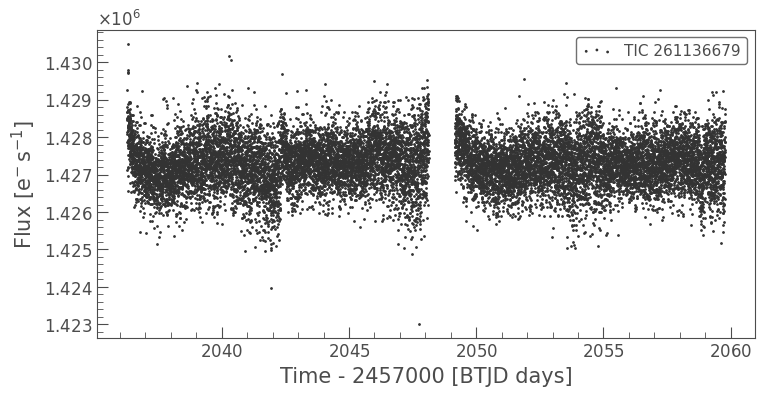

In [14]:
%matplotlib inline
lc.scatter()

## Summary

Congratulations! By now you should understand
- what TIKE is, and the principles behind cloud platforms
- basic cloud terminology: buckets, servers, and cloud
- how to access MAST data through astroquery by name, region, or criteria
- how to query TESS data and show a light curve


For full details on how TESS collects and processes images and produces light curves see the [TESS Instrument Handbook](https://archive.stsci.edu/missions/tess/doc/TESS_Instrument_Handbook_v0.1.pdf).

## Additional Resources
Can't get enough? Here are some links to more information!

If you need an introduction (or a refresher!) to basic Python syntax, there are several great resources available online. [CodeAcademy](https://www.codecademy.com/learn/learn-python-3) is a great service with a totally free option for getting started with Python, note you will have to create an account to use it. Additionally, the Youtube channel FreeCodeCamp.org has a great [video tutorial](https://www.youtube.com/watch?v=rfscVS0vtbw) on everyting you need to get started programming in Python. Another good resource is the [Python 4 Everyone](https://www.py4e.com/) book. 

The full astropy documentation can be found [here](https://docs.astropy.org/en/stable/index.html).

For more info on FITS files, here is a link to the [FITS NASA site](https://fits.gsfc.nasa.gov/). 

SIMBAD is a web-based query service from the University of Strasbourg, it is a great resource for getting quick info on stars and other astronomical targets. Here is the link to [Pi Mensae's SIMBAD page](https://simbad.u-strasbg.fr/simbad/sim-basic?Ident=pi+mensae&submit=SIMBAD+search)